#1.0 Initial Data Exploration

In [ ]:
# downloading the provided data
!gdown 1wG1jLCHW763jjChf99whUip8VHEUW1-S
!unzip /content/filtered_paranmt.zip

Downloading...
From: https://drive.google.com/uc?id=1wG1jLCHW763jjChf99whUip8VHEUW1-S
To: /content/filtered_paranmt.zip
100% 44.4M/44.4M [00:00<00:00, 70.8MB/s]
Archive:  /content/filtered_paranmt.zip
  inflating: filtered.tsv            


In [ ]:
# Doing all the necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

In [ ]:
# loading the data into a pandas dataframe
df = pd.read_csv('/content/filtered.tsv', sep='\t')

In [ ]:
df.head()

,Unnamed: 0,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
2,2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068
3,3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348


In [ ]:
df.describe()

,Unnamed: 0,similarity,lenght_diff,ref_tox,trn_tox
count,577777.000000,577777.000000,577777.000000,577777.000000,577777.000000
mean,288888.000000,0.758469,0.157652,0.541372,0.434490
std,166789.997578,0.092695,0.108057,0.457571,0.458904
min,0.000000,0.600001,0.000000,0.000033,0.000033
25%,144444.000000,0.681105,0.066667,0.012171,0.000707
50%,288888.000000,0.754439,0.141791,0.806795,0.085133
75%,433332.000000,0.831244,0.238095,0.990469,0.973739
max,577776.000000,0.950000,0.400000,0.999724,0.999730


In [ ]:
# Lets see the most toxic sentences
df_toxic = df.sort_values(by='ref_tox', ascending=False).head(100)
df_toxic.reset_index(drop=True, inplace=True)
df_toxic.head(20)["reference"].values

array(['His father would have used a booming voice to wrench a reply from this stupid machine.',
       'You have to send those idiots back in.',
       'Salina could be with that stupid cop.',
       "And don't let those idiots in radiology hold you up.",
       'My idiot friend here brought marijuana... - on the plane.',
       'That stupid couple told her to break up with you.',
       'The idiot, Max. He never should have sold it to you guys.',
       "Fuck you, soft. You're panicking",
       "It's coz of those two idiots. They escaped through a tunnel.",
       'You have to let this stupid plane crash make the decision for you.',
       "Audrey Cruz is an idiot. He's the boss.",
       "Why don't you get a job. Instead of playing golf with your stupid buddies?",
       'How do you like your stupid game now, Tom?',
       'Think about that shit, dawg.',
       'You idiots! You have betrayed the revolution.',
       'Why is this idiot Silencer shouting so much?',
       'Just like 

## Scatter plot

In [ ]:
# there is a lot of data, so I will take just a random sample for the further explorations
sampled_df = shuffle(df)
sampled_df = sampled_df.sample(frac=0.0002)

sampled_df.size

812

In [ ]:
import warnings
warnings.filterwarnings("ignore")

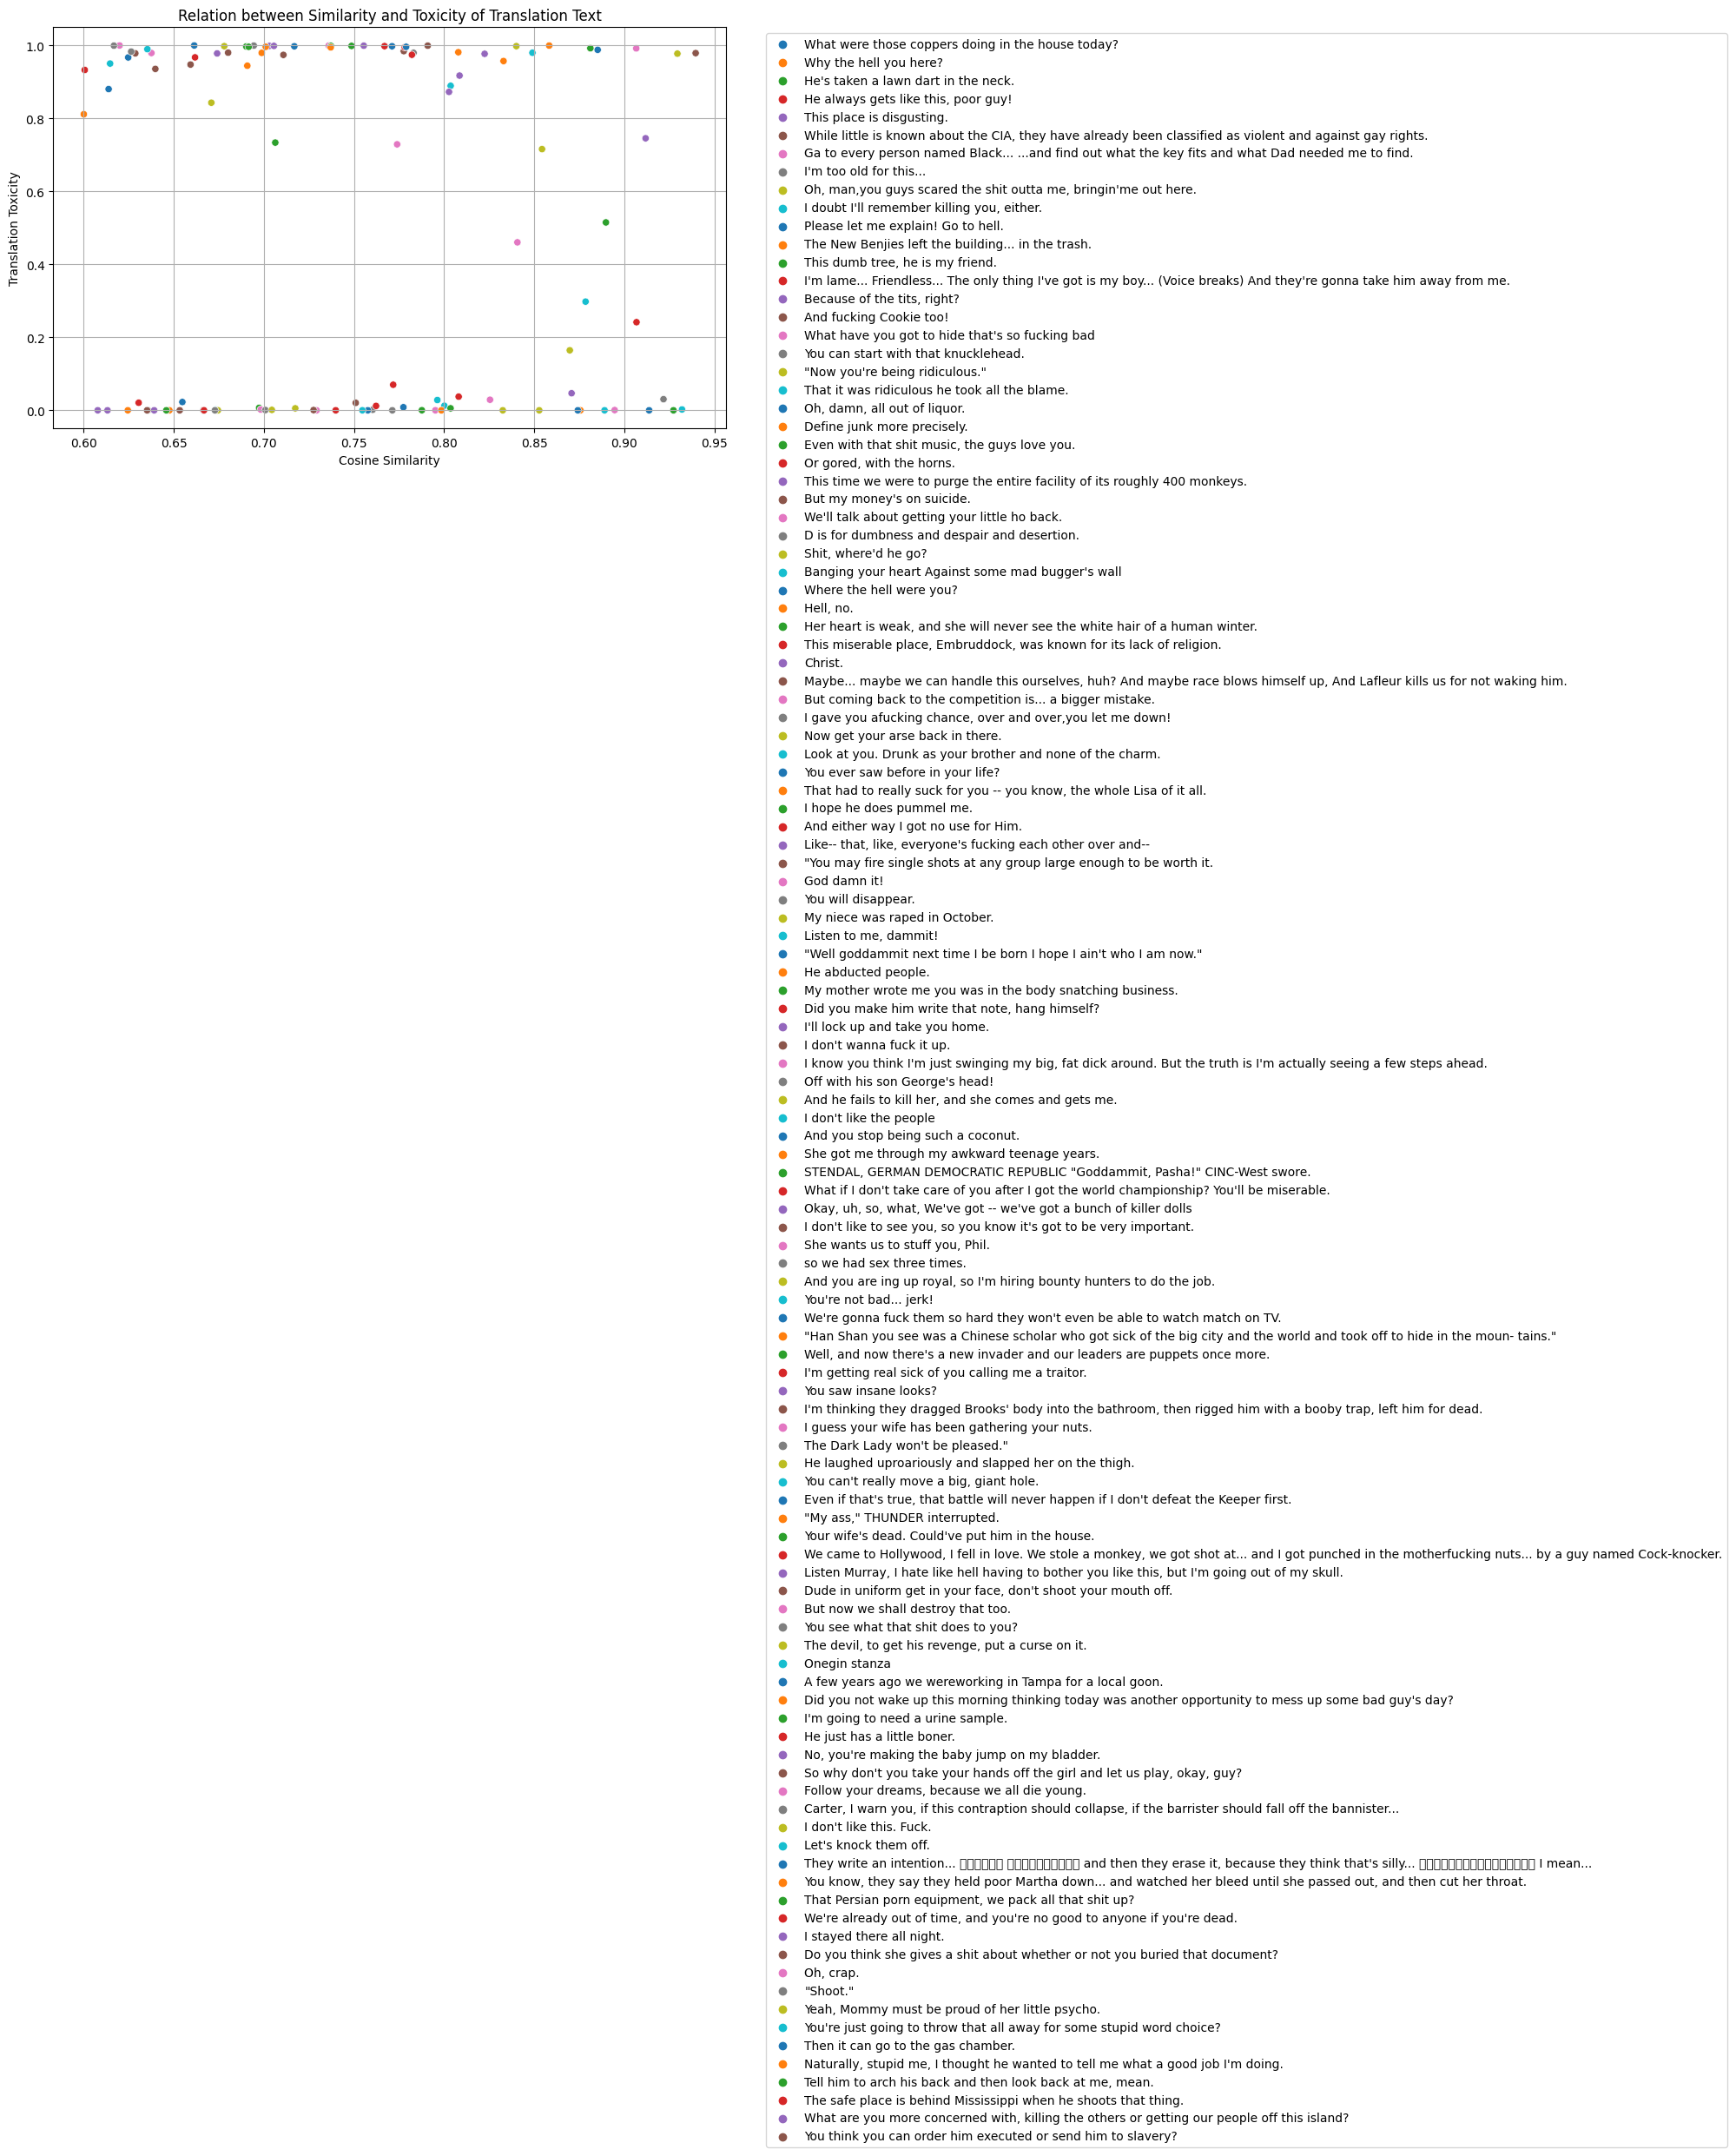

In [ ]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sampled_df, x='similarity', y='trn_tox', hue='reference', palette='tab10')

plt.xlabel('Cosine Similarity')
plt.ylabel('Translation Toxicity')
plt.title('Relation between Similarity and Toxicity of Translation Text')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid()
plt.tight_layout()
plt.show()

## Histograms

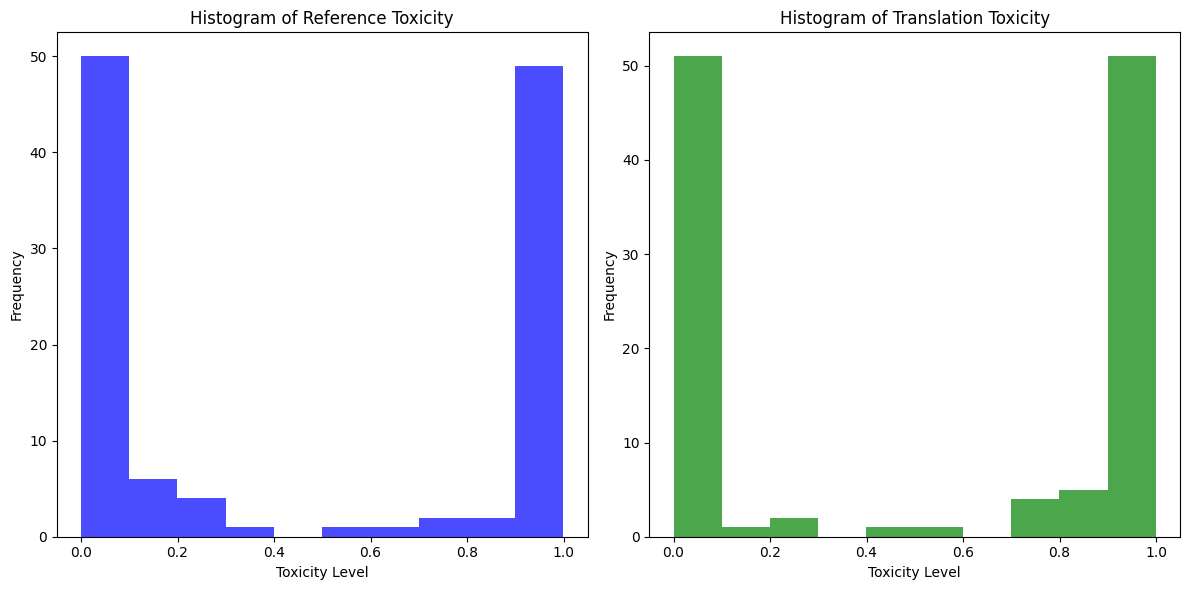

In [ ]:
# Create a two histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(sampled_df["ref_tox"], bins=10, color='blue', alpha=0.7)
plt.title('Histogram of Reference Toxicity')
plt.xlabel('Toxicity Level')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(sampled_df["trn_tox"], bins=10, color='green', alpha=0.7)
plt.title('Histogram of Translation Toxicity')
plt.xlabel('Toxicity Level')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()